# Calories burnt perdiction ML Supervised Regression Project

During exercise, the body's increased heart rate and blood flow enhance oxygen delivery to muscles, fueling the breakdown of carbohydrates and fats to produce energy. This metabolic boost results in more calories burned. As physical activity continues, the body generates heat, leading to an increase in body temperature. To regulate this temperature rise, the body initiates sweating, which helps cool the skin through evaporation. This process ensures muscles receive a continuous supply of oxygen and nutrients while removing metabolic byproducts. The rate of calorie burn is influenced by exercise intensity, duration, and individual factors like age, weight, and fitness level. Post-exercise, the body continues to burn calories through Excess Post-Exercise Oxygen Consumption (EPOC), aiding in recovery and further energy expenditure.

#### Workflow 
1. Collect the data
2. Data pre processing
3. Data Analysis
4. Train and test split
5. Train the ML model
6. Evaluation

## 1. Collect the Data
We will use fmendes-DAT263x-demos dataset from the kaggle for this Project.

#### Load Dependencies

In [629]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder


In [630]:
calories = pd.read_csv('calories.csv')
exercise = pd.read_csv('exercise.csv')

In [631]:
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [632]:
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [633]:
exercise.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64

Different exercise can cause different amount of burning calories. However we dont have any such feature in our "exercise.csv" dataset. However Body Temp and Heart Rate can help us with this problem as different exercise will have different values for these. For e.g., compare a person walking with when he is running. Duration might be same but the body temp and heart rate can't be same for both the conditions. 

#### Merge both the DataFrames into one

In [634]:
df = pd.concat([exercise,calories['Calories']], axis = 1)

In [635]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


There is no need of User_ID ,so we can drop this feature

In [636]:
df = df.drop(columns = 'User_ID')

## 2. Pre Processing

In [637]:
df.shape

(15000, 8)

In [638]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [639]:
df.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

There are no missing values, therefore we dont have the need of imputation.

## 3. Data Analysis

In [640]:
df.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [641]:
sns.set()

<Axes: xlabel='Gender', ylabel='count'>

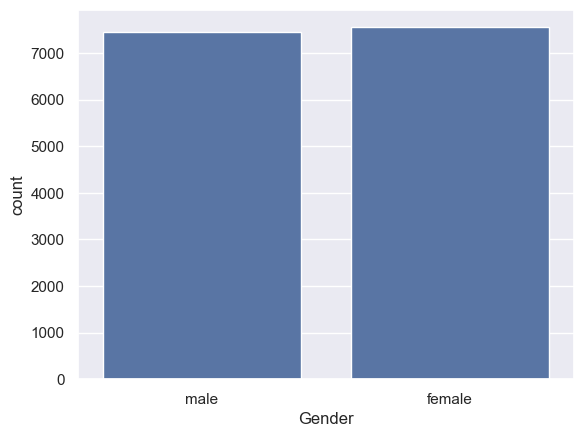

In [642]:
sns.countplot(x = 'Gender' , data = df)

With the countplot on the Gender feature we can see that the dataset is well distributed on the basis of gender.

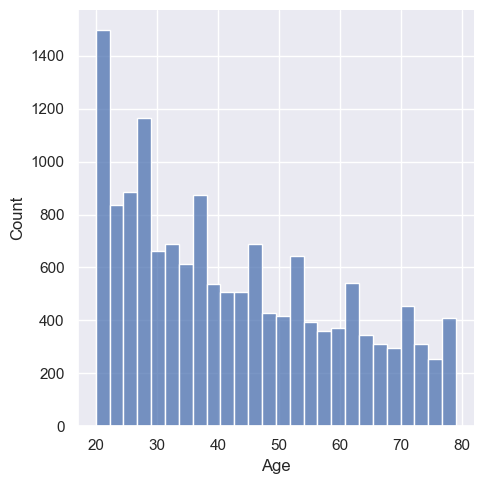

In [643]:
# Data analysis of ages
sns.displot(df['Age'])

The distributions shows that the dataset have more number of records for the people having age between 20 - 30.

C:\Users\atmar\AppData\Local\Temp\ipykernel_19864\2648961283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height'])


<Axes: xlabel='Height', ylabel='Density'>

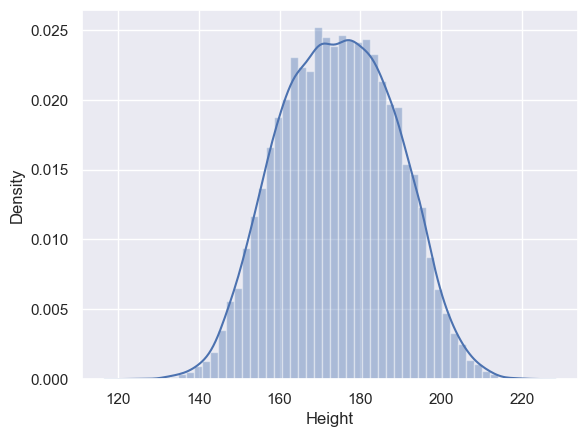

In [644]:
# Data analysis for height
sns.distplot(df['Height'])

The height feature follows Normal distrbution.

C:\Users\atmar\AppData\Local\Temp\ipykernel_19864\407518792.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

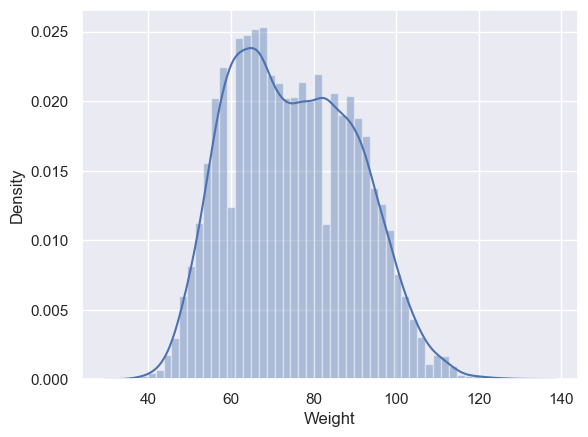

In [645]:
# Data analysis for Weight
sns.distplot(df['Weight'])

C:\Users\atmar\AppData\Local\Temp\ipykernel_19864\2203496319.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Duration'])


<Axes: xlabel='Duration', ylabel='Density'>

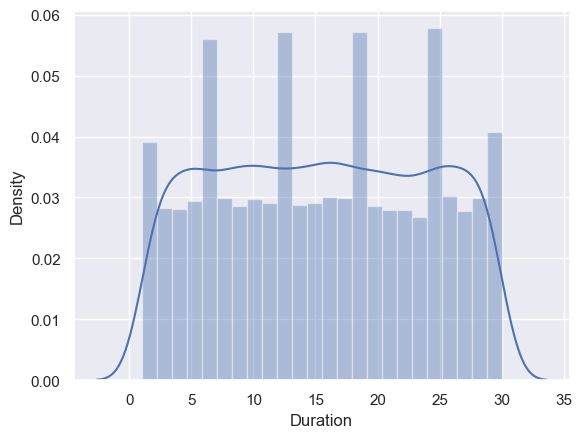

In [646]:
# Data analysis for Duration
sns.distplot(df['Duration'])

C:\Users\atmar\AppData\Local\Temp\ipykernel_19864\3829972351.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Body_Temp'])


<Axes: xlabel='Body_Temp', ylabel='Density'>

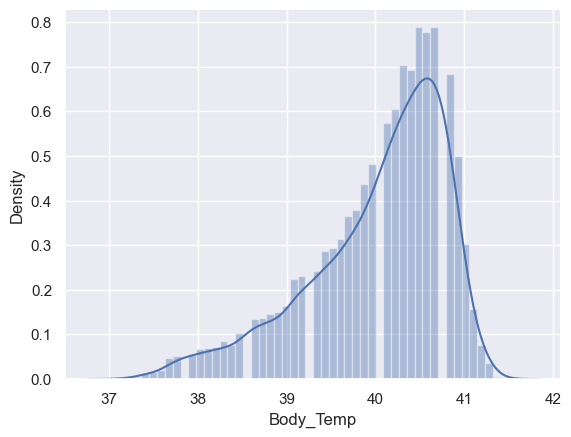

In [647]:
# Data analysis for Body_Temp	
sns.distplot(df['Body_Temp'])

C:\Users\atmar\AppData\Local\Temp\ipykernel_19864\2690680151.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Heart_Rate'])


<Axes: xlabel='Heart_Rate', ylabel='Density'>

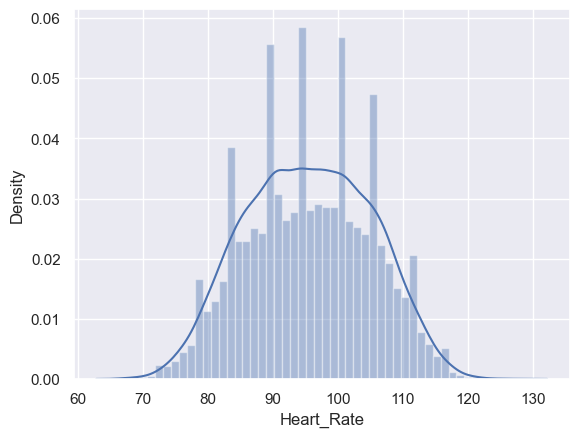

In [648]:
# Data analysis for Heart_Rate	
sns.distplot(df['Heart_Rate'])

In [649]:
print(df['Gender'].value_counts())


Gender
female    7553
male      7447
Name: count, dtype: int64


In [650]:
# Assuming df is your dataset
print(df.groupby('Gender')[['Calories', 'Duration', 'Heart_Rate', 'Body_Temp']].mean())


         Calories   Duration  Heart_Rate  Body_Temp
Gender                                             
female  88.153052  15.502185   95.408579  40.019833
male    90.945750  15.559420   95.630052  40.031153


#### Finding the correlation between the features

The correlation function requires the features to be int dtype , therefore we must change the values of gender to the int dtype.

In [651]:
# Assuming you have training data (df)
print("Low range (Age <= 30, Weight <= 60, Height <= 160):")
print(df[(df['Age'] <= 30) & (df['Weight'] <= 60) & (df['Height'] <= 160)]
      .groupby('Gender')[['Calories', 'Duration', 'Heart_Rate']].mean())
print("High range (Age > 30, Weight > 60, Height > 160):")
print(df[(df['Age'] > 30) & (df['Weight'] > 60) & (df['Height'] > 160)]
      .groupby('Gender')[['Calories', 'Duration', 'Heart_Rate']].mean())

Low range (Age <= 30, Weight <= 60, Height <= 160):
         Calories   Duration  Heart_Rate
Gender                                  
female  86.734694  15.709184   95.815051
male    19.200000   7.600000   89.400000
High range (Age > 30, Weight > 60, Height > 160):
         Calories   Duration  Heart_Rate
Gender                                  
female  89.430611  15.553453   95.458831
male    97.495285  15.547741   95.635560


Here , if we carefully look at this observation the dataset stats that females are burning more calories compare to males when the age , height , weight value is low. It can be due to limited data present in dataset and will affect out outputs when we use it in real life situations.

In [652]:
## Encode categorical variables
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
gender_encoded = encoder.fit_transform(df[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
df_encoded = pd.concat([df.drop('Gender', axis=1), gender_encoded_df], axis=1)

In [653]:
df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [654]:
df_encoded.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Gender_female,Gender_male
0,68,190.0,94.0,29.0,105.0,40.8,231.0,0.0,1.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0,1.0,0.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0,0.0,1.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0,1.0,0.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0,1.0,0.0


In [655]:
df_encoded.columns

Index(['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories', 'Gender_female', 'Gender_male'],
      dtype='object')

In [656]:
correlation = df_encoded.corr()

<Axes: >

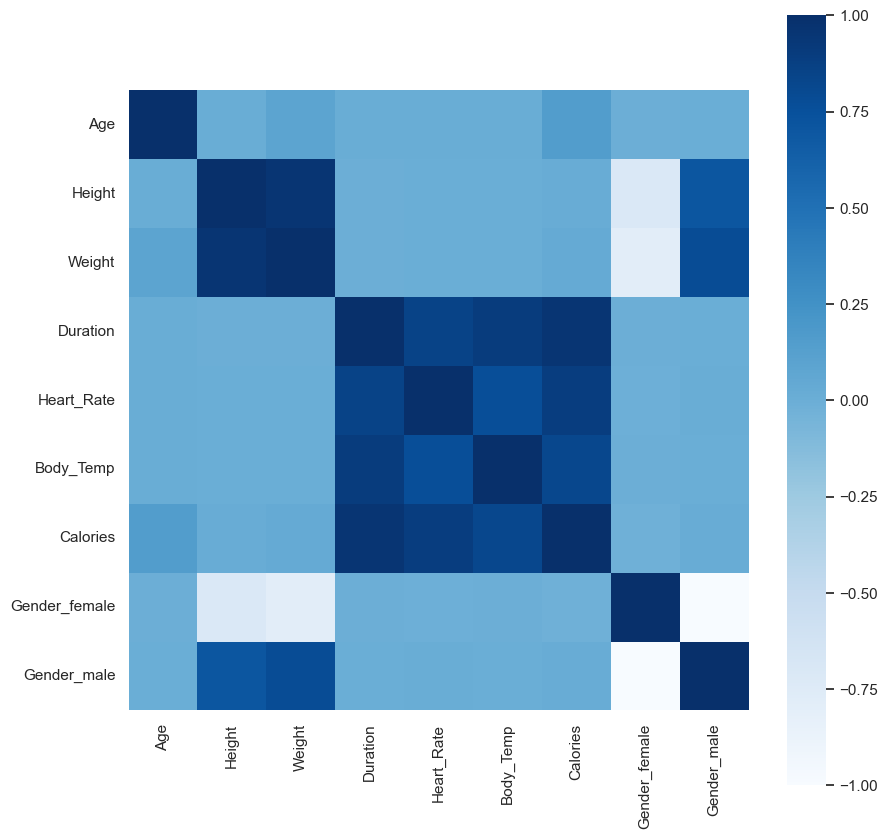

In [657]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True , square = True , fmt = '.1f', annot_kws = {'size':8}, cmap = 'Blues')

From the heatmap we can see the correlations between the features. 

## 4. Train and test Split

In [658]:
X = df_encoded.drop(columns=['Calories'], axis = 1)

In [659]:
Y = df_encoded['Calories']

#### Splitting the test and train data

In [660]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y ,test_size =  0.2, random_state = 2)

## 5. Train the ML model

#### XGBoost Regressor

In [661]:
model = XGBRegressor()

In [662]:
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [663]:
import pickle

In [664]:
with open('encoder.pkl','wb') as file:
    pickle.dump(encoder,file)

with open('model.pkl','wb') as file:
    pickle.dump(model,file)

## 6. Evalutaion


In [665]:
test_data_pre = model.predict(X_test)



In [666]:
test_data_pre[0]

125.58828

#### Mean Absolute Error


In [667]:
MAE = metrics.mean_absolute_error(Y_test, test_data_pre)

In [668]:
print("Mean Absolute Error will be: ", MAE)

Mean Absolute Error will be:  1.4836762582858403


The MAE is very low , therefore our model's predictions errors are very low

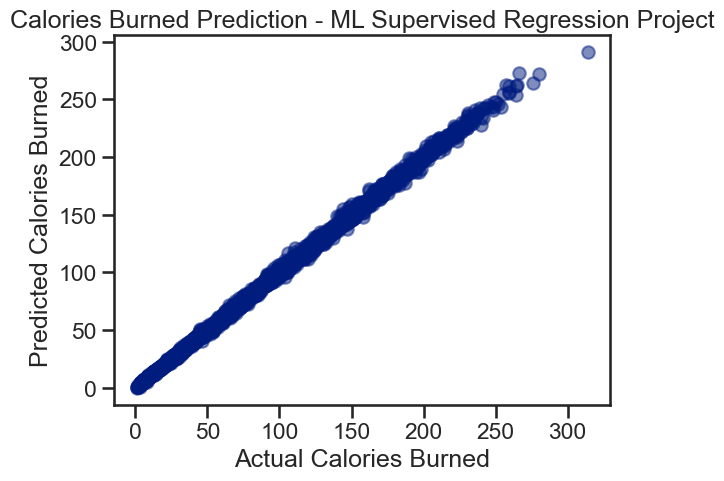

In [669]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')


ax = plt.axes()
ax.scatter(Y_test, test_data_pre, alpha=.5)


ax.set(xlabel='Actual Calories Burned', 
       ylabel='Predicted Calories Burned',
       title='Calories Burned Prediction - ML Supervised Regression Project')

plt.show()


In [670]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
mae = mean_absolute_error(Y_test, test_data_pre)
print("MAE:", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, test_data_pre)
print("MSE:", mse)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(Y_test, test_data_pre)
print("RMSE:", rmse)

# R² Score (Coefficient of Determination)
r2 = r2_score(Y_test, test_data_pre)
print("R2 Score:", r2)

MAE: 1.4836762582858403
MSE: 4.715038363064073
RMSE: 4.715038363064073
R2 Score: 0.998799522480255
